In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


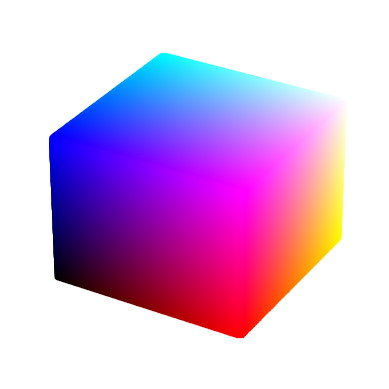

In [ ]:
## RGB Cube

import numpy as np
import matplotlib.pyplot as plt

# Full 8-bit RGB space
bits = 8
cube_dimension = 2**bits
full_rgb_space = np.zeros((cube_dimension, cube_dimension, cube_dimension, 3), dtype=np.uint8)

# Fill the 3D RGB cube
for i in range(cube_dimension):
    for j in range(cube_dimension):
        for k in range(cube_dimension):
            color = (i, j, k)
            full_rgb_space[i, j, k] = color

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# # Extract the RGB components
r, g, b = full_rgb_space[:, :, :, 0], full_rgb_space[:, :, :, 1], full_rgb_space[:, :, :, 2]

# # Reshape the RGB arrays to match the dimensions of the scatter plot
r = r.flatten()
g = g.flatten()
b = b.flatten()
#
# # Create an array of colors for each point
colors = full_rgb_space / 255.0
colors = colors.reshape(-1, 3)
#
# # Display the RGB cube using scatter plot
ax.scatter(r, g, b, c=colors, marker='s')


ax.axis('off')
plt.show()

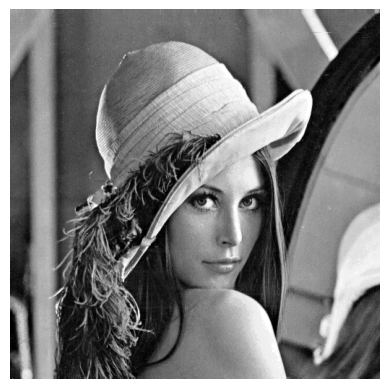

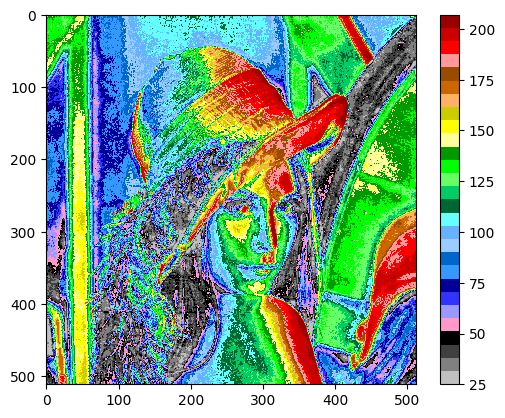

In [ ]:
## gs2rgb

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import numpy as np

# Load and display the image
image = plt.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image,cmap='gray')
plt.axis('off')

# Define the hex color codes
hexMap = ['C0C0C0', '808080', '404040', '000000', 'FF99CC', '9999FF', '3333FF', '000099', '3399FF', '0066CC',
          '99CCFF', '66B2FF', '66FFFF', '006633', '00CC66', '66FF66', '00FF00', '009900', 'FFFF99', 'FFFF00',
          'CCCC00', 'FFB266', 'CC6600', '994C00', 'FF9999', 'FF0000', 'CC0000', '990000']

# Create the color map
myColorMap = []
for hexCode in hexMap:
    rgb = np.array(mcolors.hex2color('#' + hexCode))  # Convert to NumPy array
    myColorMap.append(rgb)
myColorMap = np.array(myColorMap)

# Create a ListedColormap from myColorMap
cmap = ListedColormap(myColorMap)

# Display the image with the custom colormap
plt.figure()
plt.imshow(image, cmap=cmap)
plt.colorbar()

plt.show()


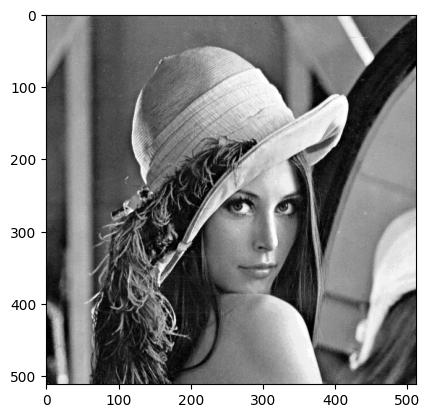

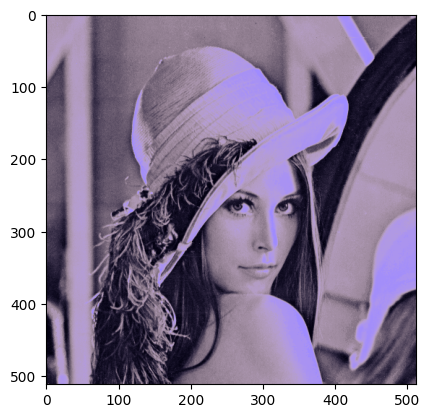

In [ ]:
## gs2rgb_psuedoColor

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(image,cmap='gray')
plt.show()

# Convert image to double
x = img.astype(float)

# Constants
c1 = 0.2
c2 = 0.4
c3 = 0.63
c4 = 0.31

# Perform the calculations
rx = x * (1 + c3 * np.sin(np.pi * x / 255) + c4 * (1 - np.cos(2 * np.pi * x / 255)))
gx = x * (1 + c1 * np.sin(np.pi * x / 255) + c2 * (1 - np.cos(2 * np.pi * x / 255)))
bx = 2 * x + rx - gx

# Create the RGB image
rgb = np.dstack((rx, gx, bx))
rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Display the RGB image
plt.imshow(rgb)
plt.show()

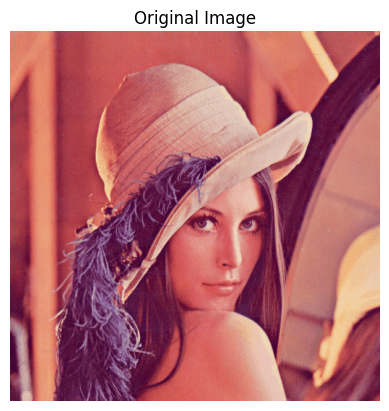

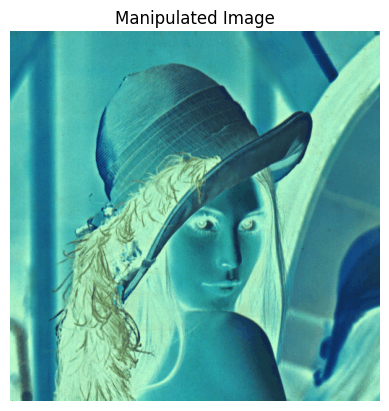

In [ ]:
## negative_rgb

import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Read the image (adjust the file path accordingly)
image_path = '/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp'
im = io.imread(image_path)

# Display the original image using Matplotlib
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Perform color manipulation
im[:, :, 0] = 255 - im[:, :, 0]  # cyan
im[:, :, 1] = 255 - im[:, :, 1]  # magenta
im[:, :, 2] = 255 - im[:, :, 2]  # yellow

# Display the manipulated image
plt.imshow(im)
plt.title('Manipulated Image')
plt.axis('off')
plt.show()


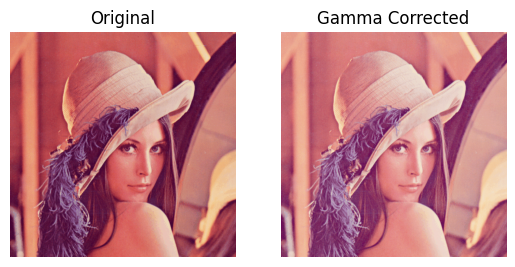

In [ ]:
## gamma_correction

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte, exposure

from __future__ import print_function
import argparse

def adjust_gamma(image, gamma):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

# Read the image (adjust the file path accordingly)
image_path = '/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp'
image = io.imread(image_path)

# Display the original image using Matplotlib
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

# Perform gamma correction
gamma = 1.5
im = adjust_gamma(image, gamma)

# Display the gamma-corrected image
plt.subplot(1, 2, 2)
plt.imshow(im)
plt.title('Gamma Corrected')
plt.axis('off')

plt.show()


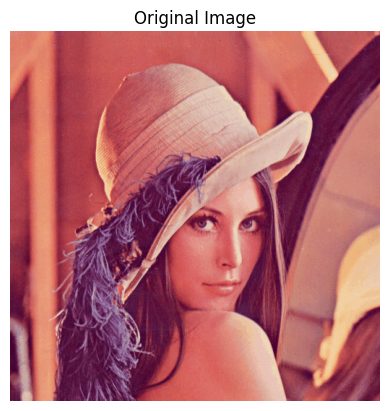

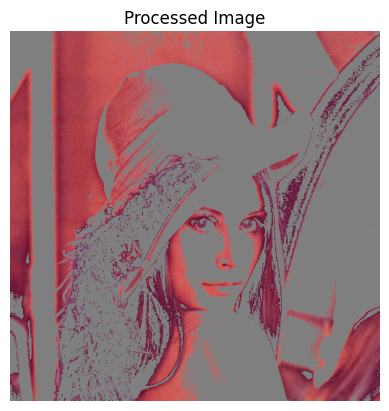

In [ ]:
## color_slicing

import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Read the image (adjust the file path accordingly)
image_path = '/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp'
image = io.imread(image_path)

# Convert to double
image = image / 255.0  # Normalize to range [0, 1]

plt.figure(1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

M, N, color_space = image.shape

red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]

sample_color = np.array([0.6863, 0.1608, 0.1922])
radius = 0.315

for i in range(M):
    for j in range(N):
        color_difference_squared = np.sum((image[i, j, :] - sample_color)**2)
        if color_difference_squared > radius**2:
            image[i, j, 0] = 0.5
            image[i, j, 1] = 0.5
            image[i, j, 2] = 0.5

plt.figure(2)
plt.imshow(image)
plt.title('Processed Image')
plt.axis('off')

plt.show()
